In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


### Graphs for Experiments

In [3]:
def mse_loss_with_nans(prediction, target, ax):

    # Mask missing values in target observations
    mask = pd.isna(target)

    # mean of the squared error along axis. 
    # axis 1 is column wise e.g. for each feature
    # axis 0 is row wise e.g. to get mse per timestep
    mse = np.mean((target[~mask]-prediction[~mask])**2, axis=ax)
    #mse = np.sum((target[~mask]-prediction)**2, axis=ax)


    return mse

### load data here for graph EXP1

In [4]:
##EXP 1
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded4_notext_st_fo_targets_dump.pkl", "rb") as pfile:
    notext_st, notext_fo, notext_observe_targets, notext_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded4_sb_st_fo_targets_dump.pkl", "rb") as pfile:
    sb_st, sb_fo, sb_observe_targets, sb_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded4_tf_st_fo_targets_dump.pkl", "rb") as pfile:
    tf_st, tf_fo, tf_observe_targets, tf_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded4_noise_st_fo_targets_dump.pkl", "rb") as pfile:
    noise_st, noise_fo, noise_observe_targets, noise_var_map = pickle.load(pfile)


## ONLY LAB FEATURES, ALL MODELS, DISREGARD TFID AND BERT, TO SEE HOW THEY HELPED LAB FEATURE FORECASTING
only_lab_notext_fore = notext_fo
only_lab_notext_target = notext_observe_targets
only_lab_sb = sb_fo[notext_fo.columns]
only_lab_sb_target = sb_observe_targets[notext_fo.columns]
only_lab_tf = tf_fo[notext_fo.columns]
only_lab_tf_target = tf_observe_targets[notext_fo.columns]
only_lab_noise_fore = noise_fo
only_lab_noise_target = noise_observe_targets

only_lab_sb_target = notext_observe_targets
only_lab_tf_target = notext_observe_targets
only_lab_noise_target = notext_observe_targets

tf_step = list(range(1,25,1)) * int((len(only_lab_notext_fore) / 24))
only_notext_st = pd.DataFrame(tf_step, columns=["step"])
only_tf_st = pd.DataFrame(tf_step, columns=["step"])
only_sb_st = pd.DataFrame(tf_step, columns=["step"])
only_noise_st = pd.DataFrame(tf_step, columns=["step"])


only_notext_st = only_notext_st.reset_index().drop(columns="index")
only_sb_st = only_sb_st.reset_index().drop(columns="index")
only_tf_st = only_tf_st.reset_index().drop(columns="index")
only_noise_st = only_noise_st.reset_index().drop(columns="index")


## Stepwise MSE: 
#compute MSE for each step of each patient -> sum of one row / #features = MSE at step x for one patient. 
only_notext_st["mse"] = mse_loss_with_nans(only_lab_notext_fore, only_lab_notext_target, 1)
only_sb_st["mse"] = mse_loss_with_nans(only_lab_sb, only_lab_notext_target, 1)
only_tf_st["mse"] = mse_loss_with_nans(only_lab_tf,only_lab_notext_target, 1)
only_noise_st["mse"] = mse_loss_with_nans(only_lab_noise_fore,only_lab_notext_target, 1)


## Stepwise MSE, Averaged over all patients -> (all feature errors of all patients at step x).mean()  
only_notext_step_wise_mse_mean_1 = only_notext_st.groupby("step").mean()
only_sb_step_wise_mse_mean_1 = only_sb_st.groupby("step").mean()
only_tf_step_wise_mse_mean_1 = only_tf_st.groupby("step").mean()
only_noise_step_wise_mse_mean_1 = only_noise_st.groupby("step").mean()


notext_mean_1 = mse_loss_with_nans(only_lab_notext_fore, only_lab_notext_target, None)
sb_mean_1 = mse_loss_with_nans(only_lab_sb,only_lab_notext_target, None)
tf_mean_1 = mse_loss_with_nans(only_lab_tf,only_lab_notext_target, None)
noise_mean_1 = mse_loss_with_nans(only_lab_noise_fore, only_lab_notext_target, None)


x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
labels = ['STraTS BASE','STraTS SBERT', 'STraTS TF-IDF']
#labels = ['STraTS BASE', 'STraTS SBERT','STraTS NOISE']
fig, ax = plt.subplots(
    figsize=(8, 5)
)

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
#plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=5)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

# Plot the means
ax.plot(
    [x[0], max(x)],
    [notext_mean_1, notext_mean_1],
    label="STraTS BASE mean",
    color="#2B2F42",
    linestyle="--",
    linewidth=1,
)

# Plot the baseline text
ax.text(
    x[-1] * 1.01,
    notext_mean_1,
    "STraTS BASE mean",
    color="#2B2F42",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)

ax.plot(
    [x[0], max(x)],
    [sb_mean_1, sb_mean_1],
    label="STraTS SBERT mean",
    color="#EF233C",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    sb_mean_1,
    "STraTS SBERT mean",
    color="#EF233C",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)
ax.plot(
    [x[0], max(x)],
    [tf_mean_1, tf_mean_1],
    label="STraTS TF-IDF mean",
    color="#8D99AE",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    tf_mean_1,
    "STraTS TF-IDF mean",
    color="#8D99AE",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)
i, colors = 0, ["#2B2F42", "#EF233C", "#8D99AE"]
for frame in [only_notext_step_wise_mse_mean_1, only_sb_step_wise_mse_mean_1, only_tf_step_wise_mse_mean_1]:
    ax.plot(x, frame, color=colors[i], label=labels[i], linewidth=2)
    ax.text(
        x[-1] * 1.01,
        frame.iloc[-1],
        labels[i],
        color=colors[i],
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )
   
    i+=1
# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_bounds(min(x), max(x))
ax.set_xticks(np.arange(min(x), max(x) + 1))
ax.set_xlabel("forecasting step")
ax.set_ylabel("average masked MSE")
ax.tick_params(axis='x', labelsize=6)
plt.savefig("./img/EXP1_stepwiseMSE.png", dpi=300,bbox_inches = 'tight')
plt.show()

print("BASE 1 mean:", notext_mean_1)
print("SBERT 1 mean:", sb_mean_1)
print("TF-IDF 1 mean:", tf_mean_1)
print("noise 1 mean:", noise_mean_1)


### load data here for graph EXP2

/Users/pablo/.conda/envs/microsoft_sepsis/lib/python3.9/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/Users/pablo/.conda/envs/microsoft_sepsis/lib/python3.9/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


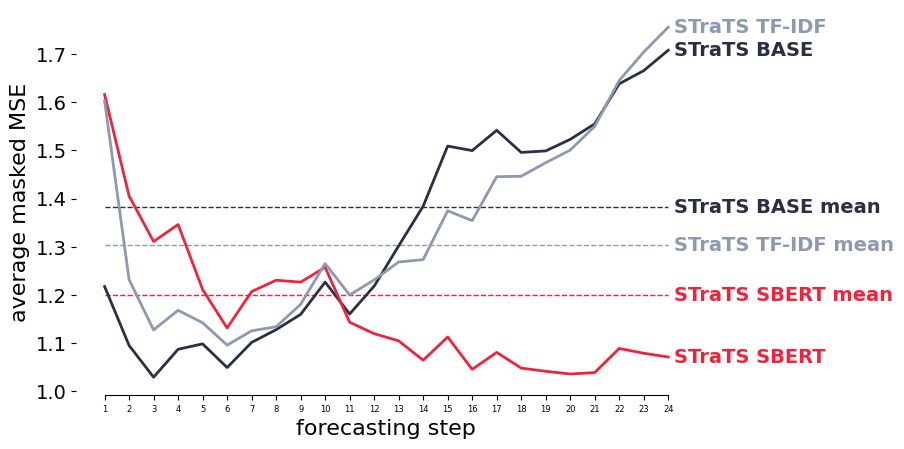

BASE 2 mean: 1.3828348639417998
SBERT 2 mean: 1.200242078588124
TF-IDF 2 mean: 1.30308315885231
noise 2 mean: 1.392530095790684


In [4]:
##EXP 2
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded5_notext_st_fo_targets_dump.pkl", "rb") as pfile:
    notext_st, notext_fo, notext_observe_targets, notext_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded5_sb_st_fo_targets_dump.pkl", "rb") as pfile:
    sb_st, sb_fo, sb_observe_targets, sb_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded5_tf_st_fo_targets_dump.pkl", "rb") as pfile:
    tf_st, tf_fo, tf_observe_targets, tf_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded5_noise_st_fo_targets_dump.pkl", "rb") as pfile:
    noise_st, noise_fo, noise_observe_targets, noise_var_map = pickle.load(pfile)

## ONLY LAB FEATURES, ALL MODELS, DISREGARD TFID AND BERT, TO SEE HOW THEY HELPED LAB FEATURE FORECASTING
only_lab_notext_fore = notext_fo
only_lab_notext_target = notext_observe_targets
only_lab_sb = sb_fo[notext_fo.columns]
only_lab_sb_target = sb_observe_targets[notext_fo.columns]
only_lab_tf = tf_fo[notext_fo.columns]
only_lab_tf_target = tf_observe_targets[notext_fo.columns]
only_lab_noise_fore = noise_fo
only_lab_noise_target = notext_observe_targets

only_lab_sb_target = notext_observe_targets
only_lab_tf_target = notext_observe_targets

tf_step = list(range(1,25,1)) * int((len(only_lab_notext_fore) / 24))
only_notext_st = pd.DataFrame(tf_step, columns=["step"])
only_tf_st = pd.DataFrame(tf_step, columns=["step"])
only_sb_st = pd.DataFrame(tf_step, columns=["step"])
only_noise_st = pd.DataFrame(tf_step, columns=["step"])


only_notext_st = only_notext_st.reset_index().drop(columns="index")
only_sb_st = only_sb_st.reset_index().drop(columns="index")
only_tf_st = only_tf_st.reset_index().drop(columns="index")
only_noise_st = only_noise_st.reset_index().drop(columns="index")


## Stepwise MSE: 
#compute MSE for each step of each patient -> sum of one row / #features = MSE at step x for one patient. 
only_notext_st["mse"] = mse_loss_with_nans(only_lab_notext_fore, only_lab_notext_target, 1)
only_sb_st["mse"] = mse_loss_with_nans(only_lab_sb, only_lab_notext_target, 1)
only_tf_st["mse"] = mse_loss_with_nans(only_lab_tf,only_lab_notext_target, 1)
only_noise_st["mse"] = mse_loss_with_nans(only_lab_noise_fore, only_lab_notext_target, 1)


## Stepwise MSE, Averaged over all patients -> (all feature errors of all patients at step x).mean()  
only_notext_step_wise_mse_mean_2 = only_notext_st.groupby("step").mean()
only_sb_step_wise_mse_mean_2 = only_sb_st.groupby("step").mean()
only_tf_step_wise_mse_mean_2 = only_tf_st.groupby("step").mean()
only_noise_step_wise_mse_mean_2 = only_noise_st.groupby("step").mean()


notext_mean_2 = mse_loss_with_nans(only_lab_notext_fore, only_lab_notext_target, None)
sb_mean_2 = mse_loss_with_nans(only_lab_sb,only_lab_notext_target, None)
tf_mean_2 = mse_loss_with_nans(only_lab_tf,only_lab_notext_target, None)
noise_mean_2 = mse_loss_with_nans(only_lab_noise_fore, only_lab_notext_target, None)


x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
labels = ['STraTS BASE','STraTS SBERT', 'STraTS TF-IDF']
#labels = ['STraTS BASE', 'STraTS SBERT','STraTS NOISE']
fig, ax = plt.subplots(
    figsize=(8, 5)
)

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
#plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=5)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

# Plot the means
ax.plot(
    [x[0], max(x)],
    [notext_mean_2, notext_mean_2],
    label="STraTS BASE mean",
    color="#2B2F42",
    linestyle="--",
    linewidth=1,
)

# Plot the baseline text
ax.text(
    x[-1] * 1.01,
    notext_mean_2,
    "STraTS BASE mean",
    color="#2B2F42",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)

ax.plot(
    [x[0], max(x)],
    [sb_mean_2, sb_mean_2],
    label="STraTS SBERT mean",
    color="#EF233C",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    sb_mean_2,
    "STraTS SBERT mean",
    color="#EF233C",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)
ax.plot(
    [x[0], max(x)],
    [tf_mean_2, tf_mean_2],
    label="STraTS TF-IDF mean",
    color="#8D99AE",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    tf_mean_2,
    "STraTS TF-IDF mean",
    color="#8D99AE",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)
i, colors = 0, ["#2B2F42", "#EF233C", "#8D99AE"]
for frame in [only_notext_step_wise_mse_mean_2, only_sb_step_wise_mse_mean_2, only_tf_step_wise_mse_mean_2]:
    ax.plot(x, frame, color=colors[i], label=labels[i], linewidth=2)
    ax.text(
        x[-1] * 1.01,
        frame.iloc[-1],
        labels[i],
        color=colors[i],
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )
   
    i+=1
# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_bounds(min(x), max(x))
ax.set_xticks(np.arange(min(x), max(x) + 1))
ax.set_xlabel("forecasting step")
ax.set_ylabel("average masked MSE")
ax.tick_params(axis='x', labelsize=6)
plt.savefig("./img/EXP2_stepwiseMSE.png", dpi=300,bbox_inches = 'tight')
plt.show()

print("BASE 2 mean:", notext_mean_2)
print("SBERT 2 mean:", sb_mean_2)
print("TF-IDF 2 mean:", tf_mean_2)
print("noise 2 mean:", noise_mean_2)


### load data here for graph EXP3

/Users/pablo/.conda/envs/microsoft_sepsis/lib/python3.9/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/Users/pablo/.conda/envs/microsoft_sepsis/lib/python3.9/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


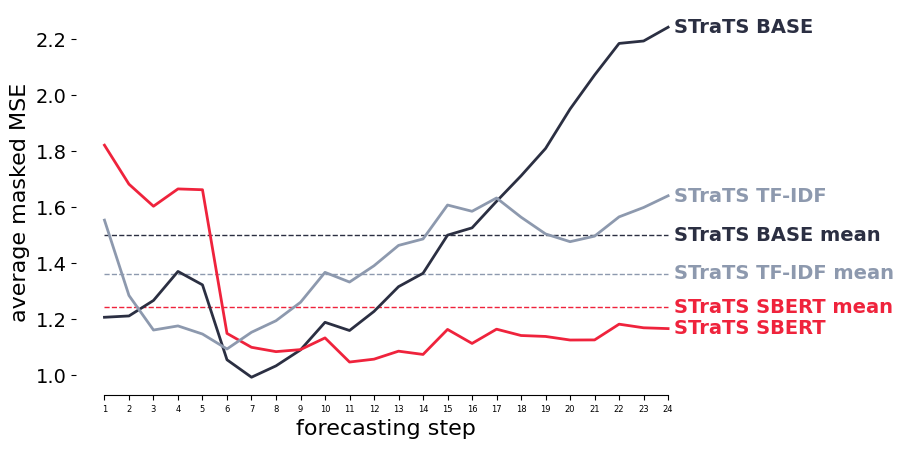

BASE 3 mean: 1.4997503832230048
SBERT 3 mean: 1.2436737241729694
TF-IDF 3 mean: 1.362721185447937
noise 3 mean: 1.5089856793175551


In [5]:
##EXP 3
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded6_notext_st_fo_targets_dump.pkl", "rb") as pfile:
    notext_st, notext_fo, notext_observe_targets, notext_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded6_sb_st_fo_targets_dump.pkl", "rb") as pfile:
    sb_st, sb_fo, sb_observe_targets, sb_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded6_tf_st_fo_targets_dump.pkl", "rb") as pfile:
    tf_st, tf_fo, tf_observe_targets, tf_var_map = pickle.load(pfile)
with open("./Experiments/unseeded_models/processed_forecasts/idfix_Unseeded6_noise_st_fo_targets_dump.pkl", "rb") as pfile:
    noise_st, noise_fo, noise_observe_targets, noise_var_map = pickle.load(pfile)

## ONLY LAB FEATURES, ALL MODELS, DISREGARD TFID AND BERT, TO SEE HOW THEY HELPED LAB FEATURE FORECASTING
only_lab_notext_fore = notext_fo
only_lab_notext_target = notext_observe_targets
only_lab_sb = sb_fo[notext_fo.columns]
only_lab_sb_target = sb_observe_targets[notext_fo.columns]
only_lab_tf = tf_fo[notext_fo.columns]
only_lab_tf_target = tf_observe_targets[notext_fo.columns]
only_lab_noise_fore = noise_fo
only_lab_noise_target = notext_observe_targets

only_lab_sb_target = notext_observe_targets
only_lab_tf_target = notext_observe_targets

tf_step = list(range(1,25,1)) * int((len(only_lab_notext_fore) / 24))
only_notext_st = pd.DataFrame(tf_step, columns=["step"])
only_tf_st = pd.DataFrame(tf_step, columns=["step"])
only_sb_st = pd.DataFrame(tf_step, columns=["step"])
only_noise_st = pd.DataFrame(tf_step, columns=["step"])


only_notext_st = only_notext_st.reset_index().drop(columns="index")
only_sb_st = only_sb_st.reset_index().drop(columns="index")
only_tf_st = only_tf_st.reset_index().drop(columns="index")
only_noise_st = only_noise_st.reset_index().drop(columns="index")


## Stepwise MSE: 
#compute MSE for each step of each patient -> sum of one row / #features = MSE at step x for one patient. 
only_notext_st["mse"] = mse_loss_with_nans(only_lab_notext_fore, only_lab_notext_target, 1)
only_sb_st["mse"] = mse_loss_with_nans(only_lab_sb, only_lab_notext_target, 1)
only_tf_st["mse"] = mse_loss_with_nans(only_lab_tf,only_lab_notext_target, 1)
only_noise_st["mse"] = mse_loss_with_nans(only_lab_noise_fore, only_lab_notext_target, 1)


## Stepwise MSE, Averaged over all patients -> (all feature errors of all patients at step x).mean()  
only_notext_step_wise_mse_mean_3 = only_notext_st.groupby("step").mean()
only_sb_step_wise_mse_mean_3 = only_sb_st.groupby("step").mean()
only_tf_step_wise_mse_mean_3 = only_tf_st.groupby("step").mean()
only_noise_step_wise_mse_mean_3 = only_noise_st.groupby("step").mean()


notext_mean_3 = mse_loss_with_nans(only_lab_notext_fore, only_lab_notext_target, None)
sb_mean_3 = mse_loss_with_nans(only_lab_sb,only_lab_notext_target, None)
tf_mean_3 = mse_loss_with_nans(only_lab_tf,only_lab_notext_target, None)
noise_mean_3 = mse_loss_with_nans(only_lab_noise_fore, only_lab_notext_target, None)


x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
labels = ['STraTS BASE','STraTS SBERT', 'STraTS TF-IDF']
#labels = ['STraTS BASE', 'STraTS SBERT','STraTS NOISE']
fig, ax = plt.subplots(
    figsize=(8, 5)
)

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
#plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=5)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

# Plot the means
ax.plot(
    [x[0], max(x)],
    [notext_mean_3, notext_mean_3],
    label="STraTS BASE mean",
    color="#2B2F42",
    linestyle="--",
    linewidth=1,
)

# Plot the baseline text
ax.text(
    x[-1] * 1.01,
    notext_mean_3,
    "STraTS BASE mean",
    color="#2B2F42",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)

ax.plot(
    [x[0], max(x)],
    [sb_mean_3, sb_mean_3],
    label="STraTS SBERT mean",
    color="#EF233C",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    sb_mean_3,
    "STraTS SBERT mean",
    color="#EF233C",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)
ax.plot(
    [x[0], max(x)],
    [tf_mean_3, tf_mean_3],
    label="STraTS TF-IDF mean",
    color="#8D99AE",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    tf_mean_3,
    "STraTS TF-IDF mean",
    color="#8D99AE",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)
i, colors = 0, ["#2B2F42", "#EF233C", "#8D99AE"]
for frame in [only_notext_step_wise_mse_mean_3, only_sb_step_wise_mse_mean_3, only_tf_step_wise_mse_mean_3]:
    ax.plot(x, frame, color=colors[i], label=labels[i], linewidth=2)
    ax.text(
        x[-1] * 1.01,
        frame.iloc[-1],
        labels[i],
        color=colors[i],
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )
   
    i+=1
# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_bounds(min(x), max(x))
ax.set_xticks(np.arange(min(x), max(x) + 1))
ax.set_xlabel("forecasting step")
ax.set_ylabel("average masked MSE")
ax.tick_params(axis='x', labelsize=6)
plt.savefig("./img/EXP3_stepwiseMSE.png", dpi=300,bbox_inches = 'tight')
plt.show()

print("BASE 3 mean:", notext_mean_3)
print("SBERT 3 mean:", sb_mean_3)
print("TF-IDF 3 mean:", tf_mean_3)
print("noise 3 mean:", noise_mean_3)


### graph AVG

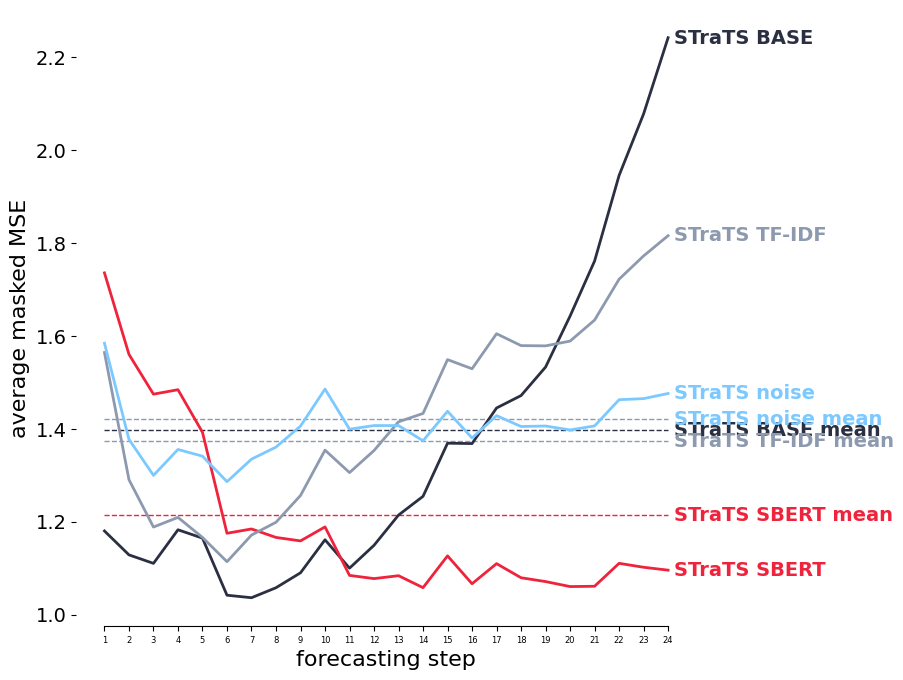

BASE avg mean: 1.3965643826711964
SBERT avg mean: 1.2137970181110938
TF-IDF avg mean: 1.3738511182246207
noise avg mean: 1.4213708933132827


In [6]:
## Stepwise MSE, Averaged over all patients and all models -> (all feature errors of all patients at step x).mean()  
only_notext_step_wise_mse_mean_avg = (only_notext_step_wise_mse_mean_1 + only_notext_step_wise_mse_mean_2 + only_notext_step_wise_mse_mean_3) / 3
only_sb_step_wise_mse_mean_avg = (only_sb_step_wise_mse_mean_1 + only_sb_step_wise_mse_mean_2 + only_sb_step_wise_mse_mean_3) / 3
only_tf_step_wise_mse_mean_avg = (only_tf_step_wise_mse_mean_1 + only_tf_step_wise_mse_mean_2 + only_tf_step_wise_mse_mean_3) / 3
only_noise_step_wise_mse_mean_avg = (only_noise_step_wise_mse_mean_1 + only_noise_step_wise_mse_mean_2 + only_noise_step_wise_mse_mean_3) / 3


notext_mean_avg = (notext_mean_1 + notext_mean_2 + notext_mean_3) / 3 
sb_mean_avg = (sb_mean_1 + sb_mean_2 + sb_mean_3) / 3
tf_mean_avg = (tf_mean_1 + tf_mean_2 + tf_mean_3) / 3
noise_mean_avg = (noise_mean_1 + noise_mean_2 + noise_mean_3) / 3 


x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
labels = ['STraTS BASE','STraTS SBERT', 'STraTS TF-IDF', 'STraTS noise']
#labels = ['STraTS BASE', 'STraTS SBERT','STraTS NOISE']
fig, ax = plt.subplots(
    figsize=(8, 8)
)

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
#plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=5)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

# Plot the means
ax.plot(
    [x[0], max(x)],
    [notext_mean_avg, notext_mean_avg],
    label="STraTS BASE mean",
    color="#2B2F42",
    linestyle="--",
    linewidth=1,
)

# Plot the baseline text
ax.text(
    x[-1] * 1.01,
    notext_mean_avg,
    "STraTS BASE mean",
    color="#2B2F42",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)

ax.plot(
    [x[0], max(x)],
    [sb_mean_avg, sb_mean_avg],
    label="STraTS SBERT mean",
    color="#EF233C",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    sb_mean_avg,
    "STraTS SBERT mean",
    color="#EF233C",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)
ax.plot(
    [x[0], max(x)],
    [tf_mean_avg, tf_mean_avg],
    label="STraTS TF-IDF mean",
    color="#8D99AE",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    tf_mean_avg,
    "STraTS TF-IDF mean",
    color="#8D99AE",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)

ax.plot(
    [x[0], max(x)],
    [noise_mean_avg, noise_mean_avg],
    label="STraTS noise mean",
    color="#8D99AE",
    linestyle="--",
    linewidth=1,
)
ax.text(
    x[-1] * 1.01,
    noise_mean_avg,
    "STraTS noise mean",
    color="#7BC9FF",
    fontweight="bold",
    horizontalalignment="left",
    verticalalignment="center",
)
i, colors = 0, ["#2B2F42", "#EF233C", "#8D99AE", "#7BC9FF"]
for frame in [only_notext_step_wise_mse_mean_avg, only_sb_step_wise_mse_mean_avg, only_tf_step_wise_mse_mean_avg, only_noise_step_wise_mse_mean_avg]:
    ax.plot(x, frame, color=colors[i], label=labels[i], linewidth=2)
    ax.text(
        x[-1] * 1.01,
        frame.iloc[-1],
        labels[i],
        color=colors[i],
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )
   
    i+=1
# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_bounds(min(x), max(x))
ax.set_xticks(np.arange(min(x), max(x) + 1))
ax.set_xlabel("forecasting step")
ax.set_ylabel("average masked MSE")
ax.tick_params(axis='x', labelsize=6)
plt.savefig("./img/EXPAVG_stepwiseMSE.png", dpi=300,bbox_inches = 'tight')
plt.show()

print("BASE avg mean:", notext_mean_avg)
print("SBERT avg mean:", sb_mean_avg)
print("TF-IDF avg mean:", tf_mean_avg)
print("noise avg mean:", noise_mean_avg)

#### Steps without any observations in testset

In [8]:
m = only_notext_st["mse"].isna()
print("Missing Steps", m.value_counts())
only_lab_notext_target[m].isna().value_counts()
(174017+2335) / 24

mse
False    174017
True       2335
Name: count, dtype: int64


7348.0

In [10]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(3)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

lab_missing = missing_values_table(notext_observe_targets)
text_missing = missing_values_table(sb_observe_targets)
print("Missing Data in LAB only",lab_missing["% of Total Values"].mean())
print("Missing Data with Text",text_missing["% of Total Values"].mean())

Your selected dataframe has 133 columns.
There are 133 columns that have missing values.
Your selected dataframe has 183 columns.
There are 183 columns that have missing values.
89.79281954887217
88.30653005464481


#### print the missingness % per feature

In [11]:
for i in range(len(lab_missing)):
    print(i, lab_missing.iloc[i])

0 Missing Values       176339.000
% of Total Values        99.993
Name: Lymphocytes (Absolute), dtype: float64
1 Missing Values       176299.00
% of Total Values        99.97
Name: Insulin NPH, dtype: float64
2 Missing Values       176210.000
% of Total Values        99.919
Name: Levofloxacin, dtype: float64
3 Missing Values       176195.000
% of Total Values        99.911
Name: Residual, dtype: float64
4 Missing Values       176107.000
% of Total Values        99.861
Name: Free Water, dtype: float64
5 Missing Values       176092.000
% of Total Values        99.853
Name: Ultrafiltrate, dtype: float64
6 Missing Values       176085.000
% of Total Values        99.849
Name: Bilirubin (Indirect), dtype: float64
7 Missing Values       176068.000
% of Total Values        99.839
Name: Albumin 25%, dtype: float64
8 Missing Values       176059.000
% of Total Values        99.834
Name: Bilirubin (Direct), dtype: float64
9 Missing Values       175985.000
% of Total Values        99.792
Name: Pre-

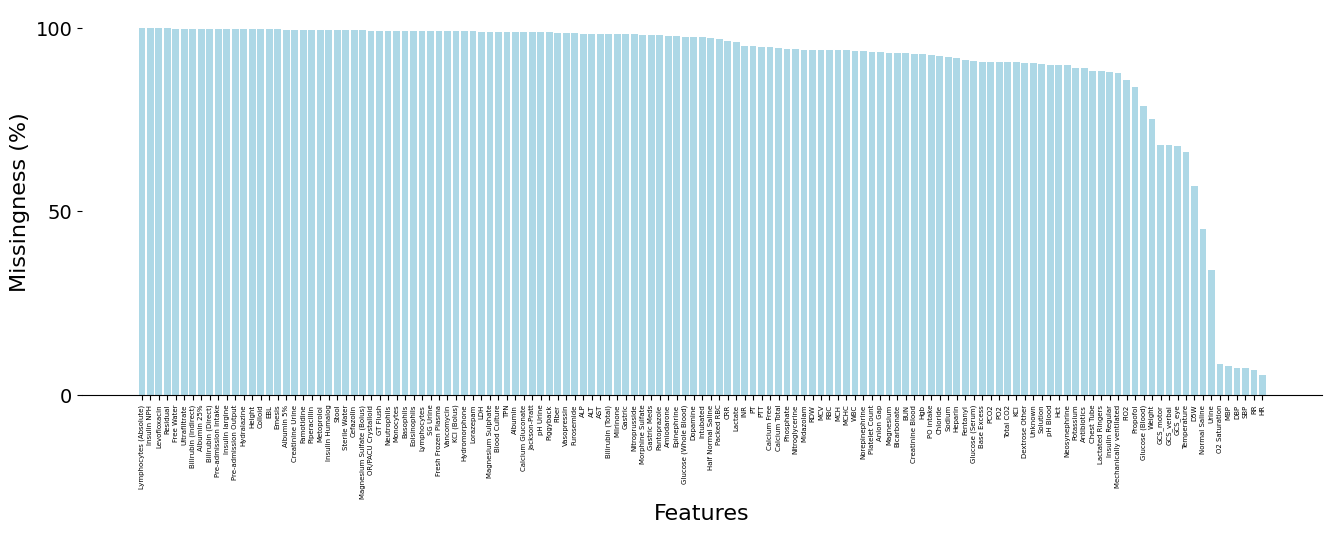

In [12]:
fig, ax = plt.subplots(
    figsize=(16, 5)
)

# Define font sizes
SIZE_SMALL = 6
SIZE_DEFAULT = 14
SIZE_LARGE = 16
#plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_SMALL)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

x = range(0,101)
ax.bar(lab_missing.index, lab_missing["% of Total Values"].values, color="lightblue", linewidth=1)
# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines

ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
#ax.spines["bottom"].set_bounds(min(x), max(x))
ax.set_yticks([0,50,100])
ax.set_xlabel("Features")
ax.set_ylabel("Missingness (%)")
plt.xticks(rotation=90)
#plt.xlim(0,18000)
#plt.ylim(0,30)
#plt.title("Average MSE from forecasting step 1 to 24")
#plt.xlabel("forecasting step")
#plt.ylabel("Average of MSE (over testset)")
#ax.legend()
plt.savefig("testsetMISSINGNESS.png", dpi=300,bbox_inches = 'tight')
plt.show()
